In [5]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
from scipy import stats

sys.path.insert(0, os.path.abspath('../src'))

from models.merton import MertonJumpDiffusion

plt.style.use('seaborn-v0_8-darkgrid')
print("Setup complete.")

Setup complete.


In [6]:
merton_params = {
    'S0': 100,
    'mu': 0.05,        # 5% total annual drift
    'sigma': 0.2,      # 20% annual volatility
    'lambda_j': 5,   # Avg 5 jumps per year
    'mu_j': -0.1,      # Jumps are -10% on average
    'sigma_j': 0.05  # Volatility of the jump
}

merton_model = MertonJumpDiffusion(**merton_params)
print(f"Model created: {merton_model}")

# Simulation settings
T = 2.0       # 2 years
dt = 1/252    # Daily steps
n_paths = 5

sim_paths = merton_model.simulate(T, dt, n_paths)

print(f"Path array shape: {sim_paths.shape}")

Model created: MertonJumpDiffusion({'S0': 100, 'mu': 0.05, 'sigma': 0.2, 'lambda_j': 5, 'mu_j': -0.1, 'sigma_j': 0.05})
Path array shape: (505, 5)


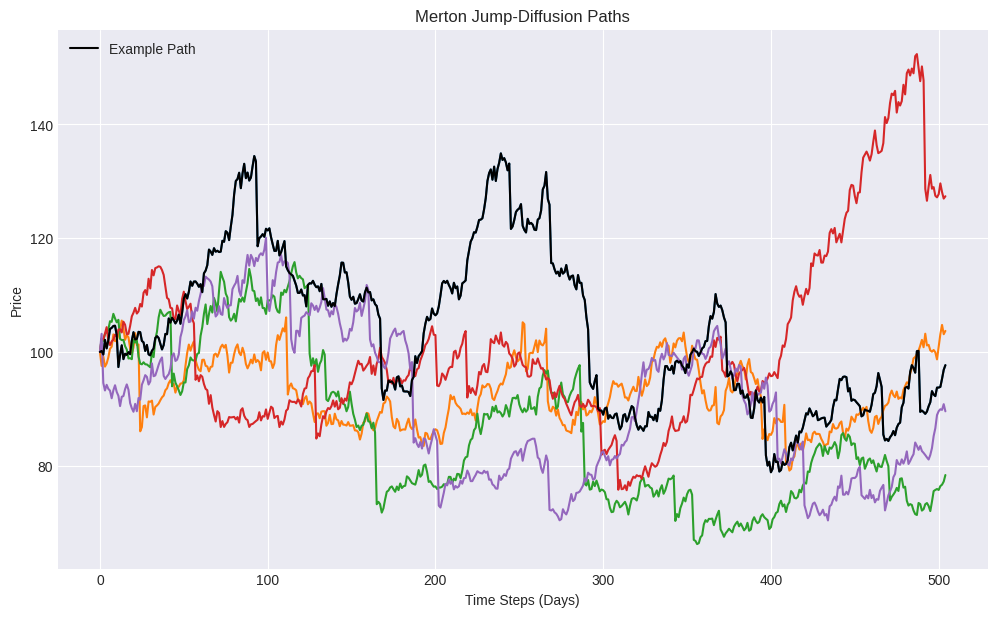

In [7]:
plt.figure(figsize=(12, 7))

plt.plot(sim_paths)

# First path in black to make it stand out
plt.plot(sim_paths[:, 0], color='black', linewidth=1.5, label="Example Path")

plt.title("Merton Jump-Diffusion Paths")
plt.xlabel("Time Steps (Days)")
plt.ylabel("Price")
plt.legend()
plt.show()

Running validation simulation...


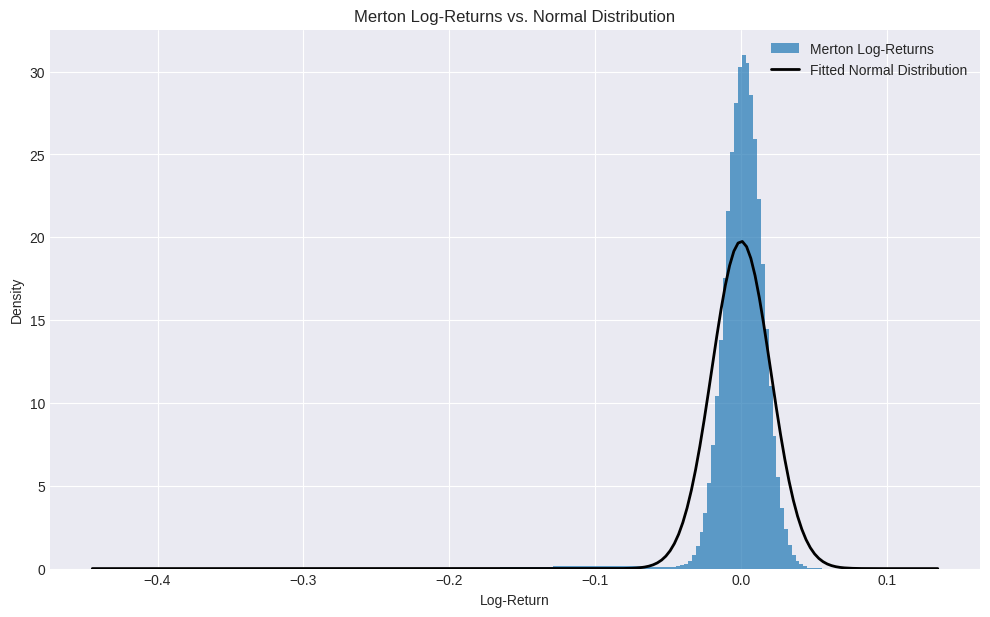

Excess Kurtosis: 32.2627


In [8]:
# Validation - Check for "Fat Tails"
# Running multiple paths to get a smooth histogram
print("Running validation simulation...")
n_val_paths = 5000
val_paths = merton_model.simulate(T, dt, n_val_paths)

# All log returns
log_returns = np.log(val_paths[1:] / val_paths[:-1])
all_log_returns = log_returns.flatten()

# --- Plot the Histogram ---
plt.figure(figsize=(12, 7))
plt.hist(
    all_log_returns, 
    bins=200, 
    density=True, 
    alpha=0.7, 
    label="Merton Log-Returns"
)

# --- Comparing to a Normal Distribution ---
# Fit a normal dist to the data
mu_fit, std_fit = stats.norm.fit(all_log_returns)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 200)
p = stats.norm.pdf(x, mu_fit, std_fit)

plt.plot(
    x, 
    p, 
    'k', 
    linewidth=2, 
    label="Fitted Normal Distribution"
)

plt.title("Merton Log-Returns vs. Normal Distribution")
plt.xlabel("Log-Return")
plt.ylabel("Density")
plt.legend()
plt.show()

# The histogram will be 'spikier' and will have
# a 'fat tail' (on the left, due to negative mu_j)
# that the normal distribution fails to capture.

# --- Checking Kurtosis ---
k = stats.kurtosis(all_log_returns)
print(f"Excess Kurtosis: {k:.4f}")

# A normal distribution has 0.0 excess kurtosis.
# A "fat-tailed" distribution will have k > 0.